# Linear Regression on Boston Housing Dataset


This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

* CRIM: The per capita crime rate in each town is an important predictor of housing prices, as neighborhoods with higher crime rates tend to have lower housing prices.
* ZN: The proportion of residential land that is zoned for lots over 25,000 sq. ft. can indicate the type of housing available in each town, with larger lots often associated with more affluent areas.
* INDUS: The proportion of non-retail business acres per town can indicate the level of commercial development in each area, which can impact the local economy and job market.
* CHAS: The Charles River dummy variable is used to identify which tracts of land are located near the river, which can be an attractive feature for some homebuyers and may impact housing prices.
* NOX: The nitric oxide concentration in each town is a measure of air pollution, which can impact both the health of residents and the desirability of the area.
* RM: The average number of rooms per dwelling is an indicator of housing size, which can impact both housing prices and the type of residents who live in each area.
* AGE: The proportion of owner-occupied units that were built before 1940 can indicate the age of the housing stock in each area, which can impact both the character of the neighborhood and the level of maintenance required.
* DIS: The weighted distances to employment centers can impact commuting times for residents and also indicate the availability of jobs in each area.
* RAD: The index of accessibility to radial highways can impact commuting times and also indicate the level of connectivity to other areas.
* TAX: The full-value property tax rate per $10,000 can impact the affordability of housing and also indicate the level of services and amenities provided by local government.
* B: The measure of the proportion of African American residents can indicate the level of diversity and also potentially impact social dynamics within each area.
* LSTAT: The percentage of lower status of the population can indicate the level of poverty in each area, which can impact both the character of the neighborhood and the types of services and amenities available to residents.
* MEDV: The median value of owner-occupied homes is an important predictor of housing prices and can indicate the overall level of affluence in each area.

## Import the required Libraries



In [44]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

## Load the Boston Housing DataSet from scikit-learn

#### When you run the above code in Python, it will output the following keys of the boston_dataset dictionary:
Here's what each key represents:

* 'data': A numpy array containing the feature data.
* 'target': A numpy array containing the target variable (i.e., the median value of owner-occupied homes in each town).
* 'feature_names': A list of the feature names.
* 'DESCR': A description of the dataset.
* 'filename': The path to the CSV file containing the data.





In [45]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

## Load the data into pandas dataframe
When you run the above code in Python, it will create a Pandas DataFrame called boston with the feature data from the Boston Housing dataset.

The pd.DataFrame() function converts the data attribute of the boston_dataset dictionary (which is a NumPy array) into a DataFrame and sets the column names to the feature_names attribute of the same dictionary.

Calling boston.head() then displays the first five rows of the DataFrame, which should look something like this:
This shows the first five rows of the DataFrame, with each row corresponding to a different town or suburb in the Boston area, and each column corresponding to a different feature of the dataset.


In [46]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The above code in Python adds a new column called 'MEDV' to the boston DataFrame and populates it with the target variable (i.e., the median value of owner-occupied homes in each town) from the boston_dataset.

The code does this by assigning the target attribute of the boston_dataset dictionary to the 'MEDV' column of the boston DataFrame.

After running this code, the boston DataFrame should now have 14 columns, with 'MEDV' as the last column.

In [47]:
boston['MEDV'] = boston_dataset.target


## Data Preprocessing

#### check for missing values in the dataset
Checking for missing values in a dataset is an important step in data analysis and preparation.

Missing values can occur for a variety of reasons, such as data entry errors, equipment failure, or non-response from study participants.

If missing values are present in a dataset and not handled properly, they can lead to biased or incorrect analyses and predictions.

Therefore, it is important to check for missing values in the dataset and decide on the appropriate way to handle them. This may involve deleting rows or columns with missing values, imputing missing values with estimated values, or using models that are robust to missing values.



In [48]:
boston.isnull().sum()     

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### Check datatype of each independent variables
To check the data type of each independent variable (also called a feature or predictor) in the boston DataFrame, you can use the dtypes attribute.

Here's an example code snippet to do this:
When you run this code, it will print the data type of each column in the boston DataFrame. The output should look something like this:

In [49]:
print(boston.dtypes)


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In this example, all of the independent variables are float64 data types, which means they are numeric variables with decimal values.

#### Distribution of the target values
The distribution of the target values (i.e., the median value of owner-occupied homes in each town) in the Boston Housing Dataset is important to understand because it can give insights into the range and variability of home prices in the dataset.

Knowing the distribution of the target variable can also help inform the choice of appropriate regression models to use when analyzing the data. For example, if the target variable follows a normal distribution, linear regression models may be appropriate. If the distribution is skewed, it may be necessary to transform the data or use non-linear regression models.

Additionally, understanding the distribution of the target variable can help identify potential outliers or anomalies in the data that may need to be investigated further.

To visualize the distribution of the target variable (i.e., median value of owner-occupied homes) in the Boston Housing Dataset, you can use a histogram. Here's an example code snippet to create a histogram of the target variable using the matplotlib library:

When you run this code, it will create a histogram of the target variable with 30 bins. The x-axis shows the range of median home values in thousands of dollars, and the y-axis shows the frequency (i.e., number of towns) at each value.

This histogram can give you a visual understanding of the distribution of median home values in the dataset. For example, you may be able to see whether the data is normally distributed or skewed, or whether there are any outliers or gaps in the data.

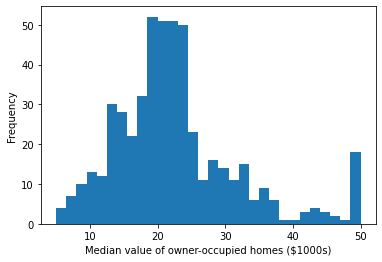

In [50]:
import matplotlib.pyplot as plt

plt.hist(boston['MEDV'], bins=30)
plt.xlabel('Median value of owner-occupied homes ($1000s)')
plt.ylabel('Frequency')
plt.show()


#### Correlation matrix
This code loads the Boston Housing Dataset, creates a pandas dataframe with the data, adds the target variable to the dataframe, computes the correlation matrix using the corr() method of the pandas dataframe, and finally prints the correlation matrix.



In [51]:
# Compute the correlation matrix
corr_matrix = boston.corr()

# Print the correlation matrix
print(corr_matrix)


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

To visualize the correlation matrix as a heatmap, you can use the seaborn library in Python. Here's an example code that uses seaborn to create a heatmap of the correlation matrix for the Boston Housing Dataset:

In [52]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)

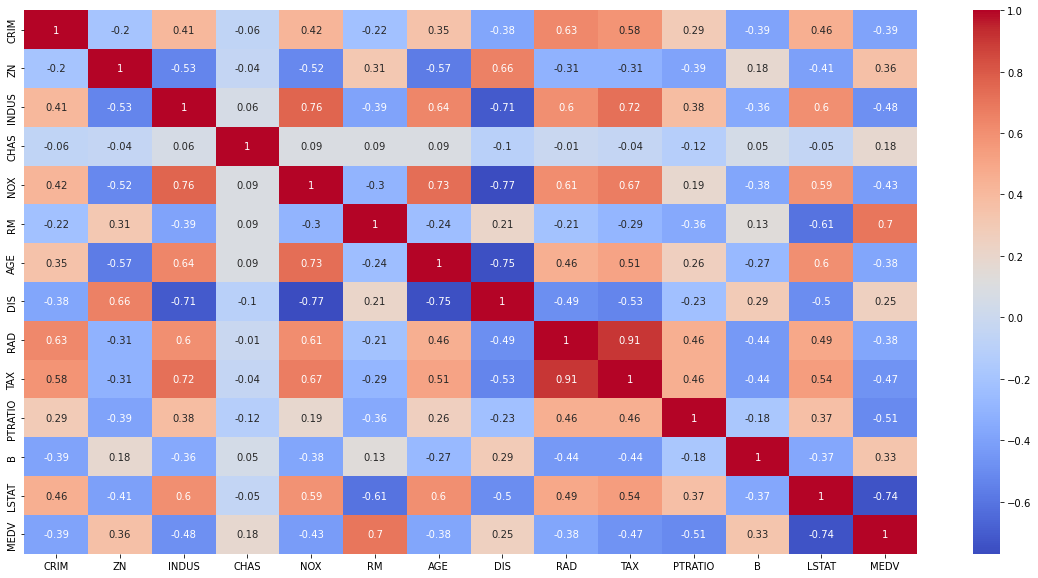

In [53]:

# Create the heatmap using seaborn
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, ax=ax)

# Show the plot
plt.show()

In this code, the figsize parameter is set to (20,10), which sets the size of the heatmap to 10 inches by 10 inches. You can adjust the size to fit your needs. The annot parameter is also set to True, which displays the correlation coefficients on the heatmap.

#### Following are Observations of Boston Housing Dataset correlation matrix

* The strongest positive correlation with the target variable MEDV (median value of owner-occupied homes in $1000s) is RM (average number of rooms per dwelling), indicating that houses with more rooms tend to have a higher median value.


* There is a strong negative correlation between MEDV and LSTAT (percentage of lower status of the population), indicating that houses located in areas with a higher percentage of lower status population tend to have a lower median value.

* There is a moderate negative correlation between MEDV and PTRATIO (pupil-teacher ratio by town), indicating that houses located in areas with a higher pupil-teacher ratio tend to have a lower median value.

 * There is a moderate positive correlation between MEDV and INDUS (proportion of non-retail business acres per town), indicating that houses located in areas with a higher proportion of non-retail business tend to have a higher median value.

* There is a weak positive correlation between MEDV and TAX (full-value property-tax rate per $10,000), indicating that houses located in areas with a higher tax rate tend to have a slightly higher median value.


* There are also some strong correlations among the features themselves, such as a strong negative correlation between DIS (weighted distances to five Boston employment centers) and INDUS, indicating that areas with a higher proportion of non-retail business tend to be farther away from employment centers.

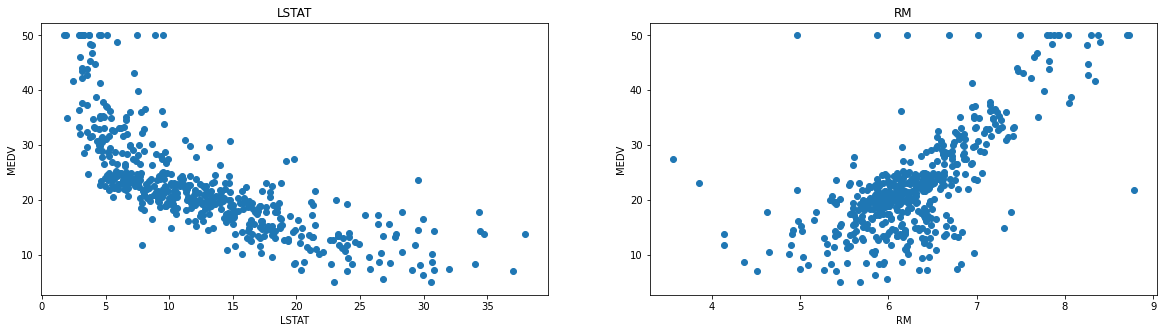

In [54]:

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


Above code generated a scatter plot for two features ('LSTAT' and 'RM') and the target variable 'MEDV' of the Boston housing dataset.

The first line sets the figure size to 20x5 inches using plt.figure(figsize=(20, 5)).

The next three lines define the features and target variables from the Boston housing dataset.

The for loop then iterates through each feature in features, and for each feature, creates a subplot using plt.subplot(1, len(features), i+1) to arrange the plots horizontally. The x variable is set to the current feature, and y is set to the target variable. A scatter plot is then created using plt.scatter(x, y, marker='o'). The title of the subplot is set to the current feature using plt.title(col), and the x and y labels are set to the current feature and 'MEDV' respectively using plt.xlabel(col) and plt.ylabel('MEDV').

Overall, the code generates a plot with two subplots, one for each feature, and shows the relationship between each feature and the target variable. The output of the code is a plot with two subplots, where the first subplot shows the relationship between 'LSTAT' and 'MEDV', and the second subplot shows the relationship between 'RM' and 'MEDV'.

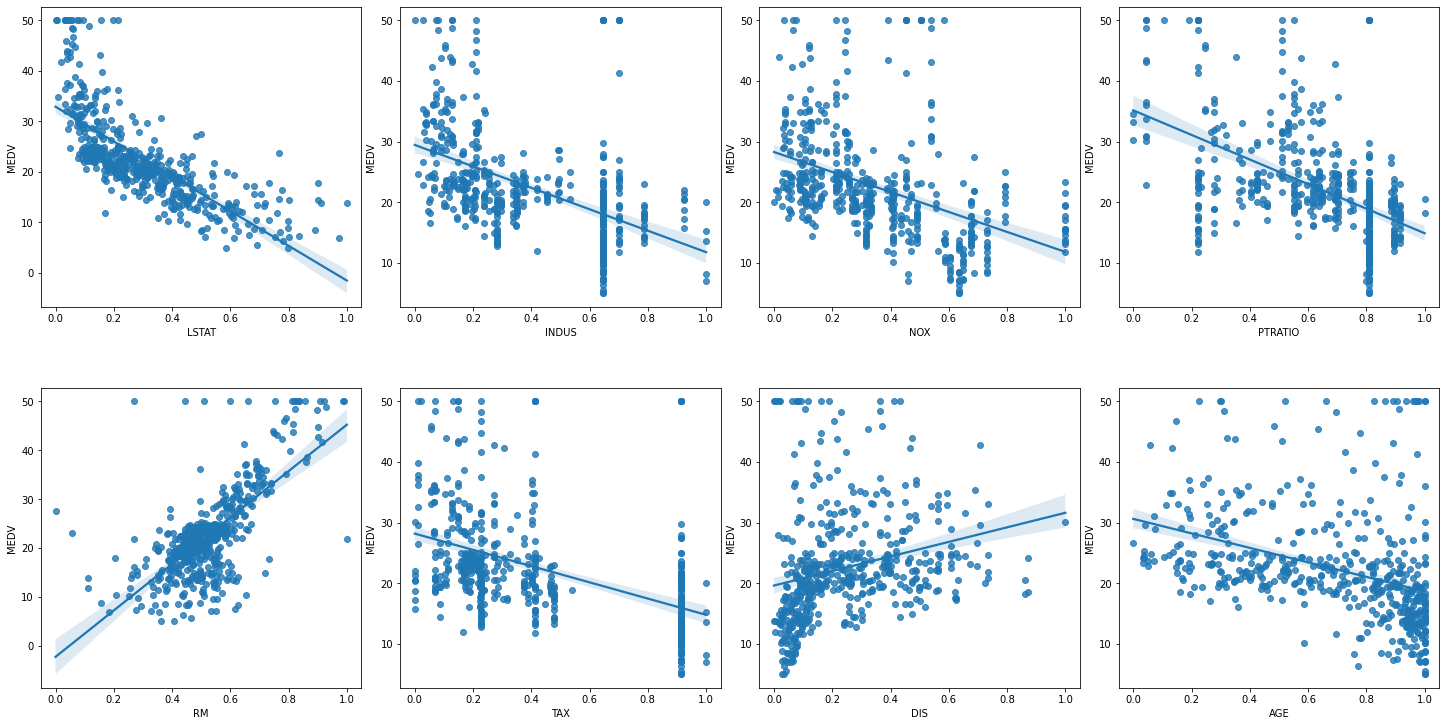

In [55]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = boston.loc[:,column_sels]
y = boston['MEDV']
#x = pd.DataFrame(boston=min_max_scaler.fit_transform(x), columns=column_sels)
x = pd.DataFrame(min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Above code is using the MinMaxScaler class from the preprocessing module of the sklearn library to scale the values of certain columns of the Boston Housing dataset before plotting them against the target variable MEDV. The MinMaxScaler scales the data between 0 and 1.

The columns selected for scaling and plotting are LSTAT, INDUS, NOX, PTRATIO, RM, TAX, DIS, and AGE.

The scaled values of the selected columns are stored in a dataframe x, and the target variable MEDV is stored in a separate variable y.

The subplots() function from the matplotlib.pyplot module is used to create a 2 x 4 grid of subplots. The regplot() function from the seaborn module is used to plot each of the selected columns against the target variable.

The output is a grid of scatter plots with regression lines representing the relationship between each of the selected columns and the target variable.

## Prepare the data for training



In [56]:
# Creating Predictor variable 'X' and Target Variable 'y'

# X contains all the features except for the target value Price
X = boston.drop('MEDV', axis = 1)
y = boston['MEDV']

In [57]:
X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [58]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## Training set and a testing set

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=50)

# X_train contains 70% of total dataset
print(X_train.shape)
# X_test contains 30% of total dataset
print(X_test.shape)

(354, 13)
(152, 13)


#### This code uses the train_test_split() function from the sklearn.model_selection module to split the Boston Housing dataset into training and testing datasets.

##### The function takes four arguments:

* X: The feature matrix containing all the predictor variables (columns) for each data point (row).
* y: The target variable (column) containing the corresponding output values for each data point.
* test_size: The proportion of the dataset to include in the test split. In this case, 30% of the dataset is used for testing, and 70% is used for training.
* random_state: A random seed used to ensure reproducibility of the results.

##### The function returns four arrays:

* X_train: The feature matrix for the training dataset.
* X_test: The feature matrix for the testing dataset.
* y_train: The target variable for the training dataset.
* y_test: The target variable for the testing dataset.
The two print statements are used to display the number of data points in the training and testing datasets, respectively.

## Creating and training Model



In [60]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()

Model.fit(X_train,y_train)


LinearRegression()

* The above code trains a linear regression model on the training set (X_train and y_train) using the LinearRegression class from scikit-learn.
* The first line imports the LinearRegression class from scikit-learn's linear_model module.
* The second line creates an instance of the LinearRegression class and assigns it to the variable Model.
* The third line fits the linear regression model to the training data (X_train and y_train) using the fit() method of the LinearRegression class. 
* The fit() method estimates the coefficients of the linear regression model by minimizing the residual sum of squares between the predicted values and the actual values in the training data. Once the model is fitted, it can be used to make predictions on new data.

## Evaluate the model by checking out it's intercept and coefficients

In [61]:
# print the intercept
print(Model.intercept_)

#Coefficients
coeff_df = pd.DataFrame(Model.coef_,X.columns,columns=['Coefficient'])
coeff_df

25.469528442762886


,Coefficient
CRIM,-0.102245
ZN,0.031104
INDUS,0.014369
CHAS,1.659646
NOX,-15.869391
RM,5.032224
AGE,-0.000716
DIS,-1.313538
RAD,0.255945
TAX,-0.012337


* The first line of code prints the intercept of the linear regression model, which is the point at which the regression line intersects the y-axis.
* The second line of code creates a pandas dataframe called coeff_df containing the coefficients of the linear regression model. The coefficients represent the change in the target variable (in this case, MEDV) for a one-unit change in the corresponding feature.

* The Model.coef_ attribute returns an array of the coefficients of the features. These coefficients are then added to the dataframe coeff_df with the feature names (columns) as the index. The columns argument specifies the name of the column containing the coefficients as "Coefficient".

### Observations from Coefficient Values

The coefficients represent the change in the target variable (MEDV) for a one-unit change in the corresponding feature while holding all other features constant.

* A positive coefficient indicates that as the feature increases, the target variable also tends to increase.
* A negative coefficient suggests that as the feature increases, the target variable tends to decrease.
* The magnitude of the coefficient indicates the strength of the relationship between the feature and the target variable.

##### From the above coefficient values, we can make the following observations:

* The features 'NOX' and 'DIS' have the strongest relationships with the target variable 'MEDV', with coefficients of -15.87 and -1.31, respectively. This means that for a one-unit increase in NOX, the MEDV tends to decrease by 15.87 units, while for a one-unit increase in DIS, the MEDV tends to decrease by 1.31 units.
* The feature 'RM' has a positive coefficient of 5.03, indicating that an increase in the average number of rooms per dwelling tends to lead to an increase in the MEDV.
* The feature 'PTRATIO' has a negative coefficient of -0.90, indicating that an increase in the pupil-teacher ratio tends to lead to a decrease in the MEDV.
* The other coefficients are relatively small, suggesting weaker relationships with the target variable.

## Predictions from Model



Text(0, 0.5, 'Predicted prices')

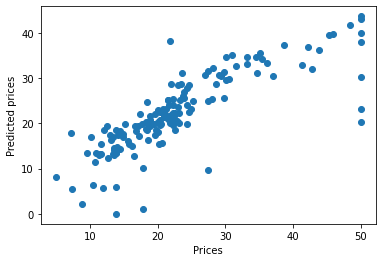

In [62]:
pred = Model.predict(X_test)
plt.scatter(y_test,pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

The code is creating a scatter plot between the actual prices (y_test) and the predicted prices (pred) obtained from the model on the test dataset. The x-axis represents the actual prices and the y-axis represents the predicted prices.

## Linear Regression evaluation metrics ( Accuracy measurements)



##### Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) are all metrics used to evaluate the performance of regression models.

* Mean Absolute Error (MAE): MAE is the average of the absolute differences between predicted and actual values. It measures the average magnitude of the errors in a set of predictions, without considering their direction. The formula for MAE is:

MAE = (1/n) * ∑|y - ŷ|

* Mean Squared Error (MSE): MSE is the average of the squared differences between predicted and actual values. It measures the average of the squares of the errors in a set of predictions. The formula for MSE is:

MSE = (1/n) * ∑(y - ŷ)²

* Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. It measures the standard deviation of the errors in a set of predictions. The formula for RMSE is:

RMSE = √(MSE)

All three metrics have the same unit as the target variable and a lower value indicates a better fit between the predicted and actual values.

In [63]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.678977534499423
MSE: 33.868033996670015
RMSE: 5.819624901715747


#### Observations from Above Results

The Mean Absolute Error (MAE) is 3.68, which means that, on average, our model’s predictions are off by $3.68K from the actual value.

The Mean Squared Error (MSE) is 33.87, which is the average of the squared differences between predicted and actual values. The larger the MSE, the more scattered the data points.

The Root Mean Squared Error (RMSE) is 5.82, which is the square root of the MSE. The RMSE gives an estimate of the standard deviation of the residuals (prediction errors). In other words, it tells us how concentrated the data is around the line of best fit. A lower RMSE indicates a better fit.

Overall, these metrics indicate that the model is making decent predictions, with a relatively low error rate. However, it is always recommended to compare these values with other models or use domain knowledge to determine if these errors are acceptable for the specific use case.

Thank You 